In [1]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect(r"C:\Users\VARUN\Downloads\archive\password_data.sqlite")

# Load the 'Users' table into a Pandas DataFrame
query = "SELECT * FROM Users"
df_users = pd.read_sql_query(query, conn)

# Display the first few rows of the DataFrame to understand its structure
print(df_users)
print(df_users.shape)

# Close the database connection
conn.close()

       index                 password  strength
0          0                zxe870819         1
1          1             xw46454nr23l         1
2          2                soporte13         1
3          3  accounts6000webhost.com         2
4          4                 c443balg         1
...      ...                      ...       ...
99995  99995               obejofi215         1
99996  99996               fmiopvxb64         1
99997  99997                czvrbun38         1
99998  99998                mymyxe430         1
99999  99999              glqjhkxb467         1

[100000 rows x 3 columns]
(100000, 3)


In [2]:
import numpy as np

# Display the data structure
print("Data Structure:")
print(df_users.info())

# Check for missing values
print("\nMissing Values:")
print(df_users.isnull().sum())

# Summarize the distribution of password strengths
print("\nDistribution of Password Strengths:")
print(df_users['strength'].value_counts(normalize=True))

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   index     100000 non-null  int64 
 1   password  100000 non-null  object
 2   strength  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB
None

Missing Values:
index       0
password    0
strength    0
dtype: int64

Distribution of Password Strengths:
1    0.73883
0    0.13622
2    0.12495
Name: strength, dtype: float64


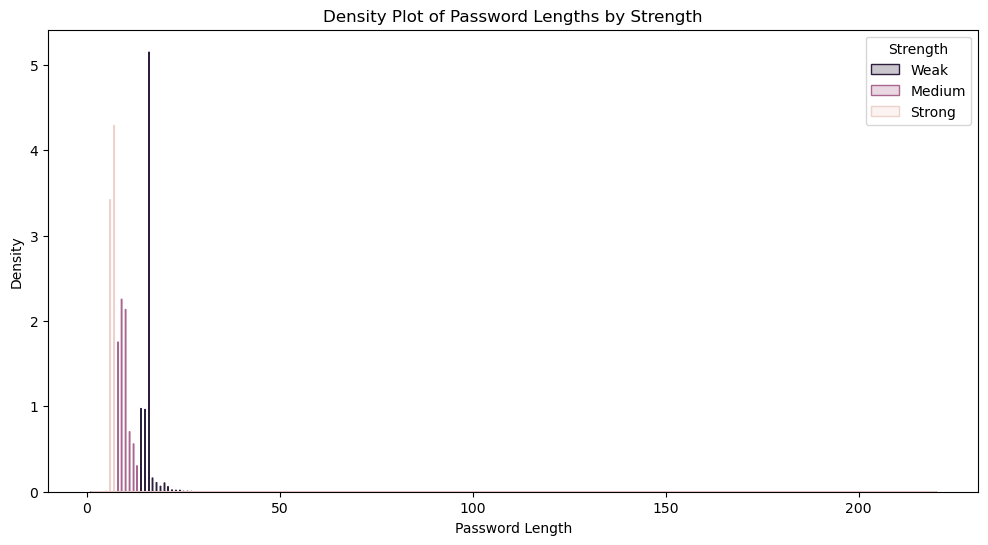

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the length of each password
df_users['password_length'] = df_users['password'].apply(len)

# Plotting the distribution of password lengths
plt.figure(figsize=(12, 6))
sns.histplot(df_users, x='password_length', hue='strength', element='step', stat='density', common_norm=False)
plt.title('Density Plot of Password Lengths by Strength')
plt.xlabel('Password Length')
plt.ylabel('Density')
plt.legend(title='Strength', labels=['Weak', 'Medium', 'Strong'])
plt.show()

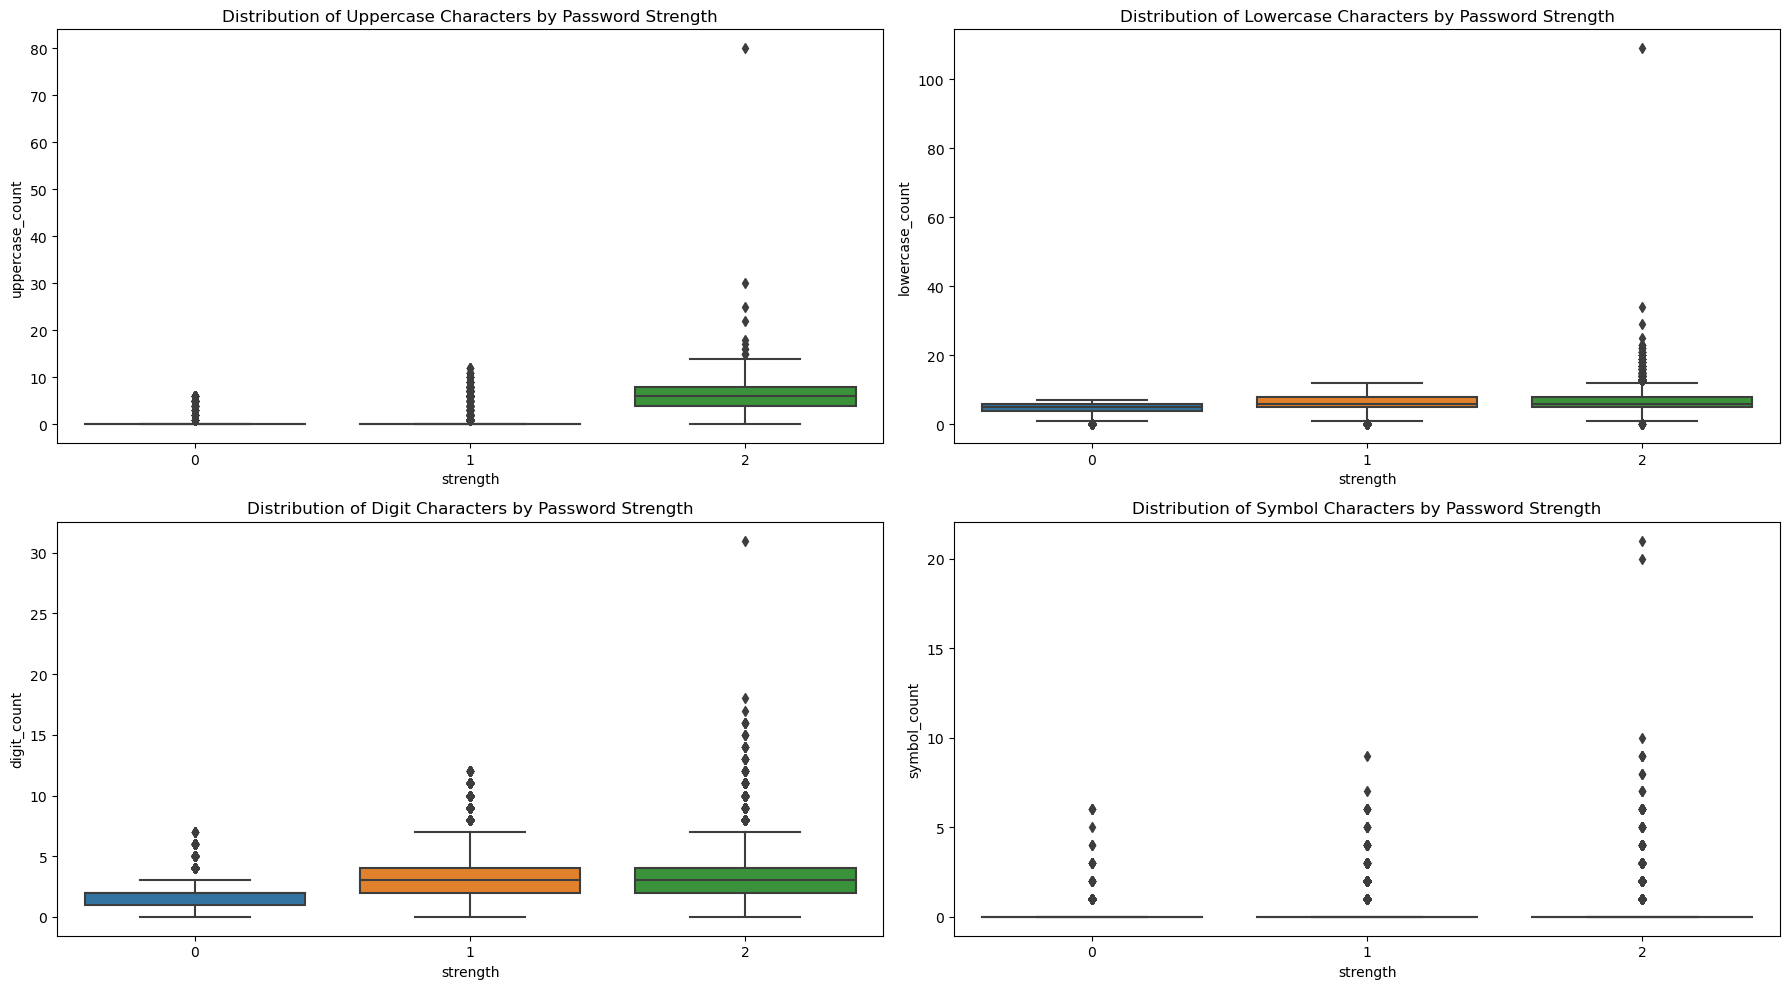

In [4]:
# Analyzing the use of different character types in passwords of varying strengths
def count_uppercase(password):
    return sum(1 for char in password if char.isupper())

def count_lowercase(password):
    return sum(1 for char in password if char.islower())

def count_digits(password):
    return sum(1 for char in password if char.isdigit())

def count_symbols(password):
    return sum(1 for char in password if not char.isalnum())

# Apply the functions to the DataFrame
df_users['uppercase_count'] = df_users['password'].apply(count_uppercase)
df_users['lowercase_count'] = df_users['password'].apply(count_lowercase)
df_users['digit_count'] = df_users['password'].apply(count_digits)
df_users['symbol_count'] = df_users['password'].apply(count_symbols)

# Plotting the results
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x='strength', y='uppercase_count', data=df_users)
plt.title('Distribution of Uppercase Characters by Password Strength')

plt.subplot(2, 2, 2)
sns.boxplot(x='strength', y='lowercase_count', data=df_users)
plt.title('Distribution of Lowercase Characters by Password Strength')

plt.subplot(2, 2, 3)
sns.boxplot(x='strength', y='digit_count', data=df_users)
plt.title('Distribution of Digit Characters by Password Strength')

plt.subplot(2, 2, 4)
sns.boxplot(x='strength', y='symbol_count', data=df_users)
plt.title('Distribution of Symbol Characters by Password Strength')

plt.tight_layout()
plt.show()


Percentage of weak passwords containing common dictionary words: 0.09%


<Axes: xlabel='strength', ylabel='count'>

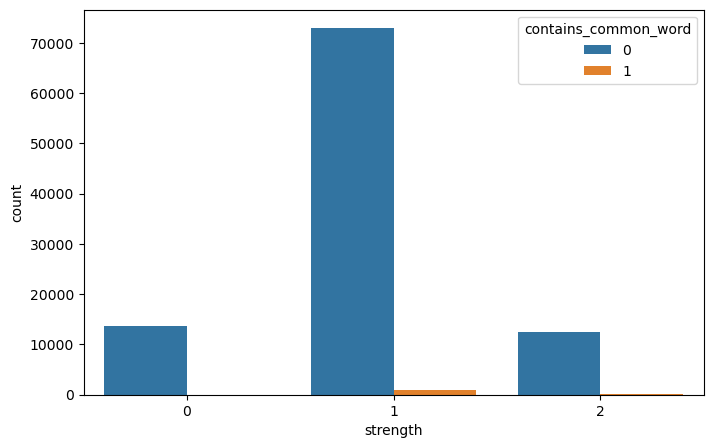

In [5]:
    # Analyzing the presence of common patterns or dictionary words in weak passwords

    common_words = ['password', '123456', '123456789', 'qwerty', 'abc123', 'monkey', '12345678', 'letmein', 'trustno1', 'dragon','ninja']

    # Function to check if the password contains any common dictionary words
    def contains_common_word(password):
        for word in common_words:
            if word in password:
                return 1
        return 0

    # Apply the function to the DataFrame
    df_users['contains_common_word'] = df_users['password'].apply(contains_common_word)

    # Analyze the presence of common words in weak passwords
    weak_passwords = df_users[df_users['strength'] == 0]  # Assuming '0' is the label for weak passwords
    common_word_count_weak = weak_passwords['contains_common_word'].sum()

    # Percentage of weak passwords containing common words
    percentage_common_words_weak = (common_word_count_weak / len(weak_passwords)) * 100

    print(f"Percentage of weak passwords containing common dictionary words: {percentage_common_words_weak:.2f}%")

    # Visualize the presence of common words in passwords of different strengths
    plt.figure(figsize=(8, 5))
    sns.countplot(x='strength', hue='contains_common_word', data=df_users)


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the 'index' column as it is not useful for modeling
df_users = df_users.drop(columns=['index'])

# Feature Engineering: Calculate entropy of passwords
def calculate_entropy(password):
    probabilities = [float(password.count(c)) / len(password) for c in set(password)]
    entropy = -sum(p * np.log2(p) for p in probabilities)
    return entropy

df_users['password_entropy'] = df_users['password'].apply(calculate_entropy)

# Split data into features and target
X = df_users.drop(columns=['password', 'strength'])
y = df_users['strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Output the shapes of the splits for verification
print("Training features shape:", X_train_scaled.shape)
print("Testing features shape:", X_test_scaled.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (80000, 7)
Testing features shape: (20000, 7)
Training labels shape: (80000,)
Testing labels shape: (20000,)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Dropping the 'password' column as it is not needed for model training
X = df_users.drop(columns=['password', 'strength'])
y = df_users['strength']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the numeric features
scaler = StandardScaler()
numeric_features = ['password_length', 'uppercase_count', 'lowercase_count', 'digit_count', 'symbol_count', 'contains_common_word', 'password_entropy']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test[numeric_features])

print("Training features shape:", X_train_scaled.shape)
print("Testing features shape:", X_test_scaled.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training features shape: (80000, 7)
Testing features shape: (20000, 7)
Training labels shape: (80000,)
Testing labels shape: (20000,)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, rf_classifier.predict_proba(X_test_scaled), multi_class='ovr')

# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC Score: 1.0000


Classification Report:
              precision    recall  f1-score   support

        Weak       1.00      1.00      1.00      2700
      Medium       1.00      1.00      1.00     14852
      Strong       1.00      1.00      1.00      2448

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



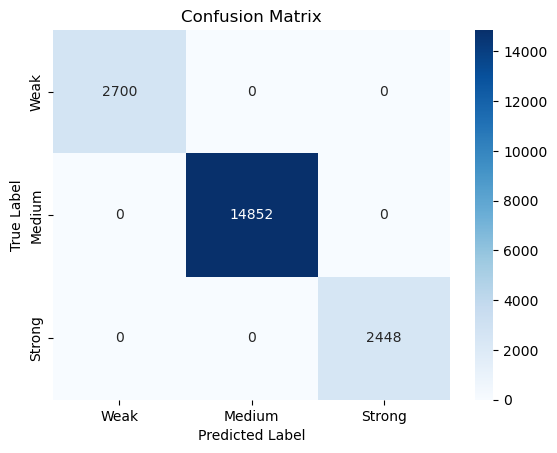

In [9]:
# Evaluate the performance of the RandomForest model using various metrics
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Weak', 'Medium', 'Strong']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

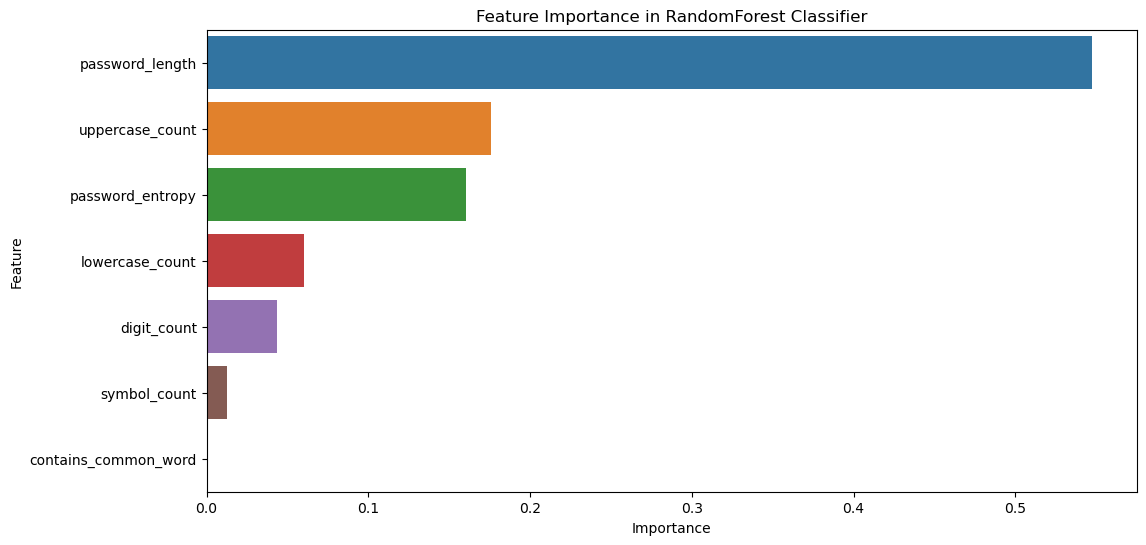

In [10]:
# Analyzing the importance of different features in the RandomForest model
feature_importances = rf_classifier.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame to view the feature importances
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in RandomForest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

        Weak       1.00      1.00      1.00      2700
      Medium       1.00      1.00      1.00     14852
      Strong       1.00      1.00      1.00      2448

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



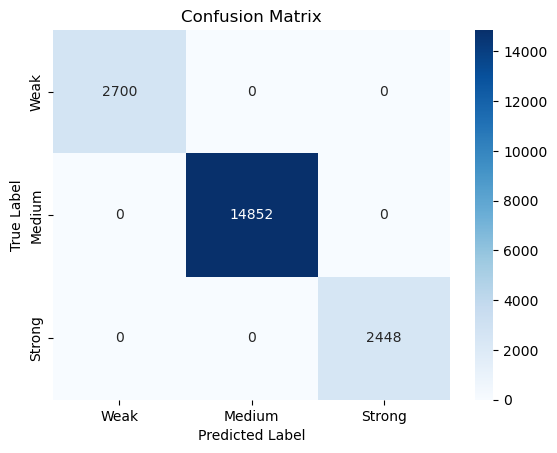

In [11]:
from sklearn.svm import SVC

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred1 = svm_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='macro')
recall = recall_score(y_test, y_pred1, average='macro')
f1 = f1_score(y_test, y_pred1, average='macro')

# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Weak', 'Medium', 'Strong']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [12]:
# Predict on the training set
y_train_pred = svm_classifier.predict(X_train_scaled)

# Calculate metrics for the training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')

# Print the performance metrics for the training set
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Precision: {train_precision:.4f}")
print(f"Training Recall: {train_recall:.4f}")
print(f"Training F1 Score: {train_f1:.4f}")

# Compare with test set performance
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Precision: {precision:.4f}")
print(f"Test Recall: {recall:.4f}")
print(f"Test F1 Score: {f1:.4f}")

Training Accuracy: 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Training F1 Score: 1.0000
Test Accuracy: 1.0000
Test Precision: 1.0000
Test Recall: 1.0000
Test F1 Score: 1.0000


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the LogisticRegression model
lr_classifier = LogisticRegression(random_state=42)

# Train the model
lr_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred2 = lr_classifier.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='macro')
recall = recall_score(y_test, y_pred2, average='macro')
f1 = f1_score(y_test, y_pred2, average='macro')
roc_auc = roc_auc_score(y_test, lr_classifier.predict_proba(X_test_scaled), multi_class='ovr')

# Print the performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 1.0000
Precision: 0.9999
Recall: 1.0000
F1 Score: 0.9999
ROC AUC Score: 1.0000


Classification Report:
              precision    recall  f1-score   support

        Weak       1.00      1.00      1.00      2700
      Medium       1.00      1.00      1.00     14852
      Strong       1.00      1.00      1.00      2448

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



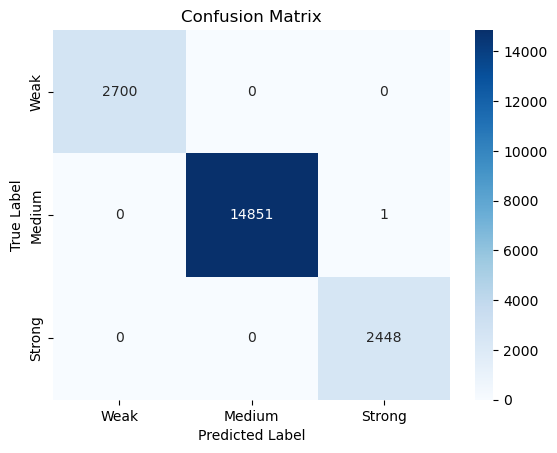

In [14]:
print("Classification Report:")
print(classification_report(y_test, y_pred2, target_names=['Weak', 'Medium', 'Strong']))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Weak', 'Medium', 'Strong'], yticklabels=['Weak', 'Medium', 'Strong'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()